In [179]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##Period or No Period for each day of User 1133

In [180]:
period = pd.read_csv('Period.csv')
period.drop('id', axis = 1, inplace=True)
period.dropna(inplace=True)
period.rename(columns={'User_id':'user_id'}, inplace=True)
period['start'] = pd.to_datetime(period['start_date'].apply(lambda x: '-'.join(['20'+str(x).split('/')[2],str(x).split('/')[1], str(x).split('/')[0]])))
period['end'] = pd.to_datetime(period['end_date'].apply(lambda x: '-'.join(['20'+str(x).split('/')[2],str(x).split('/')[1], str(x).split('/')[0]])))
period.drop('start_date', axis = 1, inplace=True)
period.drop('end_date', axis = 1, inplace=True)
period

,user_id,start,end
0,252,2015-04-05,2015-04-10
1,253,2015-03-23,2015-03-27
2,254,2015-04-06,2015-04-11
3,255,2015-03-21,2015-03-24
4,256,2015-03-26,2015-03-31
...,...,...,...
34893,1460,2019-03-15,2019-03-17
34894,6923,2019-02-17,2019-02-23
34898,2839,2019-03-13,2019-03-17
34903,5096,2019-03-09,2019-03-11


In [181]:
peri_1133=period[period.user_id==1133]
peri_1133.sort_values(by = 'start')
peri_1133.head()

,user_id,start,end
1472,1133,2015-10-03,2015-10-11
1473,1133,2015-11-02,2015-11-09
2266,1133,2015-11-30,2015-12-07
2936,1133,2015-12-26,2016-01-02
4006,1133,2016-01-26,2016-02-02


In [182]:
index = pd.date_range(start = peri_1133.start.min(), end = peri_1133.end.max())
user1133_pnp = pd.DataFrame(index = index, data = {'period_noPeriod':0})
for row in peri_1133.itertuples():
  user1133_pnp.period_noPeriod[(dates_list>=row.start) & (dates_list<= row.end)] += 1
user1133_pnp.index.name = 'date'
user1133_pnp.head()

,period_noPeriod
date,
2015-10-03,1
2015-10-04,1
2015-10-05,1
2015-10-06,1
2015-10-07,1


In [183]:
symptom = pd.read_csv('Symptom.csv')
symptom.drop('id', axis = 1, inplace=True)
symptom['date'] = pd.to_datetime(symptom['date'].apply(lambda x: '-'.join(['20'+str(x).split('/')[2],str(x).split('/')[1], str(x).split('/')[0]])))
symptom.dropna(inplace=True)
symptom.sort_values(by='date', inplace=True)
symptom.set_index('date',inplace=True)
symptom.head()

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
date,,,,,,,,,,,
2015-02-28,510,0,0,0,0,0,0,0,0,0,0
2015-04-10,257,0,0,0,46,0,0,0,0,0,0
2015-04-11,252,0,0,0,0,0,0,0,0,0,0
2015-04-11,257,0,0,0,0,0,27,48,0,0,0
2015-04-11,263,0,0,0,0,0,0,0,0,0,0


In [184]:
symp_1133=symptom[symptom.user_id==1133]
symp_1133.drop('user_id', axis = 1, inplace=True)
symp_1133.sort_values(by = 'date')
symp_1133.head()

/home/avani/.local/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
date,,,,,,,,,,
2015-11-02,0,98,80,100,0,70,100,56,97,100
2015-11-03,0,99,98,100,59,0,0,95,0,46
2015-11-05,53,0,0,46,0,52,73,0,0,0
2015-11-30,22,63,57,71,0,59,81,83,0,67
2015-12-02,73,71,69,81,2,55,57,76,28,88


In [185]:
newDf = pd.merge(user1133_pnp,symp_1133, on='date',how="left")
newDf[newDf.backache==98]

,period_noPeriod,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
date,,,,,,,,,,,
2015-11-02,1,0.0,98.0,80.0,100.0,0.0,70.0,100.0,56.0,97.0,100.0
2016-09-07,1,40.0,98.0,100.0,100.0,0.0,0.0,40.0,100.0,0.0,0.0
2018-02-22,1,0.0,98.0,94.0,99.0,56.0,0.0,0.0,44.0,0.0,0.0
2018-08-18,1,53.0,98.0,0.0,100.0,0.0,0.0,87.0,95.0,50.0,0.0
2018-09-20,1,0.0,98.0,0.0,94.0,0.0,57.0,60.0,0.0,0.0,0.0


In [186]:
newDf.to_csv(r'newData.csv')

In [187]:
#newDf.dropna(inplace=True)
newDf
newDf.reset_index(level=0, inplace=True)

## Visualizations

In [190]:
newDf.drop('period_noPeriod', 1).fillna(newDf.mean(),inplace=True)

In [191]:
newDf

,date,period_noPeriod,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
0,2015-10-03,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-10-04,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-07,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2019-03-06,1,0.0,0.0,80.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0
1251,2019-03-07,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1252,2019-03-08,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,2019-03-09,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
newDf.drop('period_noPeriod', 1).fillna(0,inplace=True)

In [193]:
INDEX="menses"
TYPE= "record"
newDf['date']=newDf['date'].astype(str)
def rec_to_actions(df):
    import json
    for record in df.to_dict(orient="records"):
        yield ('{ "index" : { "_index" : "%s", "_type" : "%s" }}'% (INDEX, TYPE))
        yield (json.dumps(record))

from elasticsearch import Elasticsearch
e = Elasticsearch() # no args, connect to localhost:9200
if not e.indices.exists(INDEX):
    raise RuntimeError('index does not exists, use `curl -X PUT "localhost:9200/%s"` and try again'%INDEX)

r = e.bulk(rec_to_actions(newDf)) # return a dict

print(not r["errors"])
newDf

False


,date,period_noPeriod,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
0,2015-10-03,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-10-04,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-07,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2019-03-06,1,0.0,0.0,80.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0
1251,2019-03-07,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1252,2019-03-08,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,2019-03-09,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


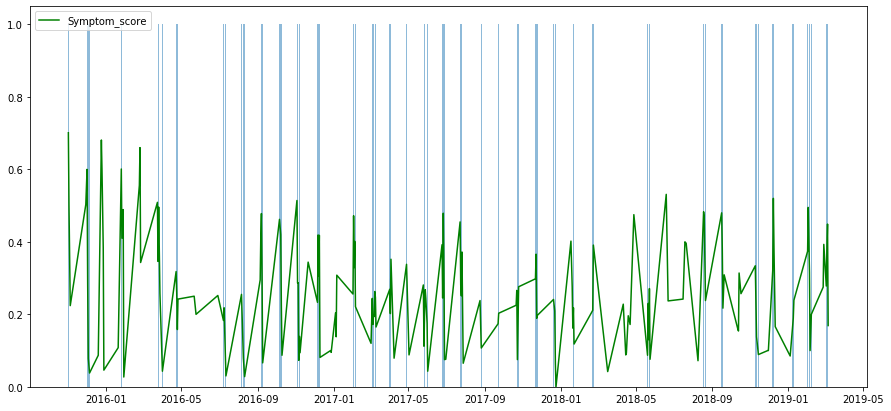

In [169]:
plt.figure(figsize=(15,7))
plt.plot(newDf.date[:-1],newDf['Symptom_score'][:-1],label='Symptom_score',c="green")
plt.bar(newDf.date,newDf.counts, align='center', alpha=0.5)
plt.legend()